In [50]:
import numpy as np
from numpy.random import sample
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.python.keras import initializers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras import layers
from tensorflow.python.keras import initializers
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import models

In [58]:
df_abnormal = pd.read_csv(r"C:\Users\Jaime\OneDrive\Documentos\5- Data Science\ecg_data\ptbdb_abnormal.csv", header=None)
df_normal = pd.read_csv(r"C:\Users\Jaime\OneDrive\Documentos\5- Data Science\ecg_data\ptbdb_normal.csv", header=None)

# Stacks df_abnormal and df_normal
df = pd.concat([df_abnormal, df_normal], axis=0)
print("\ndf class counts")
print( df.iloc[:,187].value_counts() )
print("df.shape => ", df.shape )


df class counts
1.0    10506
0.0     4046
Name: 187, dtype: int64
df.shape =>  (14552, 188)


In [69]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, shuffle=True, random_state=1)

print("X_train.shape => ", X_train.shape )
print("y_train.shape => ", y_train.shape )
print("X_test.shape =>  ", X_test.shape )
print("y_test.shape =>  ", y_test.shape )

# Prepares data for CNN ##############################################################################

# Standardizes data
sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)
x_train = sc.transform(X_train)
x_test = sc.transform(X_test)

# Reshapes arrays for cnn
n_steps = x_train.shape[1]
x_train = x_train.reshape(-1,n_steps,1)
x_test = x_test.reshape(-1,n_steps,1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("x_train.shape => ", x_train.shape)
print("x_test.shape  => ", x_test.shape)
print("y_train.shape => ", y_train.shape)
print("y_test.shape  => ", y_test.shape)

X_train.shape =>  (11641, 187)
y_train.shape =>  (11641,)
X_test.shape =>   (2911, 187)
y_test.shape =>   (2911,)
x_train.shape =>  (11641, 187, 1)
x_test.shape  =>  (2911, 187, 1)
y_train.shape =>  (11641, 2)
y_test.shape  =>  (2911, 2)


C:\anaconda\envs\tf_course\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [70]:
init = initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1)
input = layers.Input(shape=(n_steps,1)) 
conv1 = layers.convolutional.Conv1D( filters=50, kernel_size=(3), activation='relu', 
                                     activity_regularizer=regularizers.l2(0.01), 
                                     use_bias=True,bias_initializer=init, 
                                     kernel_initializer=init )(input) 
pool1 = layers.MaxPooling1D(pool_size=3)(conv1)
conv2 = layers.convolutional.Conv1D( filters=50, kernel_size=(3), activation='relu', 
                                     activity_regularizer=regularizers.l2(0.01), 
                                     use_bias=True,bias_initializer=init, 
                                     kernel_initializer=init )(pool1) 
pool2 = layers.MaxPooling1D(pool_size=3)(conv2)
conv3 = layers.convolutional.Conv1D( filters=50, kernel_size=(3), activation='relu', 
                                     activity_regularizer=regularizers.l2(0.01), 
                                     use_bias=True,bias_initializer=init, 
                                     kernel_initializer=init )(pool2) 
pool3 = layers.MaxPooling1D(pool_size=3)(conv3)

flat = layers.Flatten()(pool3)

dense1 = layers.Dense( 10,activation='relu' ,
                       use_bias=True, bias_initializer=init,
                       kernel_initializer=init )(flat) 
dense2 = layers.Dense( 2 ,activation='softmax',
                       use_bias=True, bias_initializer=init, 
                       kernel_initializer=init )(dense1)

model = models.Model(inputs=input, outputs=dense2) 
optim = optimizers.RMSprop(lr=0.0007) 
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'] )

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 187, 1)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 185, 50)           200       
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 61, 50)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 59, 50)            7550      
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 19, 50)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 17, 50)            7550      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 5, 50)             0         
__________

Train on 9312 samples, validate on 2329 samples
Epoch 1/100
9312/9312 [==============================] - 9s 958us/step - loss: 0.1341 - acc: 0.9650 - val_loss: 0.2090 - val_acc: 0.9407
Epoch 2/100
9312/9312 [==============================] - 9s 949us/step - loss: 0.1313 - acc: 0.9676 - val_loss: 0.2412 - val_acc: 0.9356
Epoch 3/100
9312/9312 [==============================] - 9s 949us/step - loss: 0.1393 - acc: 0.9623 - val_loss: 0.2174 - val_acc: 0.9386
Epoch 4/100
9312/9312 [==============================] - 9s 980us/step - loss: 0.1329 - acc: 0.9649 - val_loss: 0.2021 - val_acc: 0.9485
Epoch 5/100
9312/9312 [==============================] - 9s 955us/step - loss: 0.1370 - acc: 0.9638 - val_loss: 0.1968 - val_acc: 0.9480
Epoch 6/100
9312/9312 [==============================] - 9s 953us/step - loss: 0.1371 - acc: 0.9636 - val_loss: 0.1952 - val_acc: 0.9472
Epoch 7/100
9312/9312 [==============================] - 9s 952us/step - loss: 0.1355 - acc: 0.9651 - val_loss: 0.2862 - val_acc: 

9312/9312 [==============================] - 9s 944us/step - loss: 0.1366 - acc: 0.9647 - val_loss: 0.2278 - val_acc: 0.9365
Epoch 61/100
9312/9312 [==============================] - 9s 943us/step - loss: 0.1355 - acc: 0.9674 - val_loss: 0.2673 - val_acc: 0.9253
Epoch 62/100
9312/9312 [==============================] - 9s 943us/step - loss: 0.1343 - acc: 0.9661 - val_loss: 0.2213 - val_acc: 0.9446
Epoch 63/100
9312/9312 [==============================] - 9s 948us/step - loss: 0.1311 - acc: 0.9682 - val_loss: 0.2339 - val_acc: 0.9347
Epoch 64/100
9312/9312 [==============================] - 9s 941us/step - loss: 0.1417 - acc: 0.9628 - val_loss: 0.2117 - val_acc: 0.9425
Epoch 65/100
9312/9312 [==============================] - 9s 942us/step - loss: 0.1348 - acc: 0.9655 - val_loss: 0.2458 - val_acc: 0.9300
Epoch 66/100
9312/9312 [==============================] - 9s 952us/step - loss: 0.1314 - acc: 0.9672 - val_loss: 0.2049 - val_acc: 0.9433
Epoch 67/100
9312/9312 [=======================

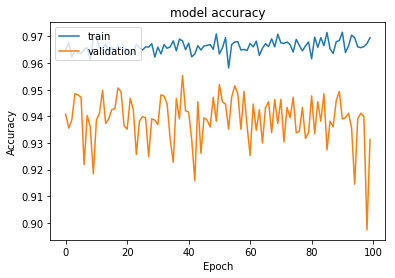

2911/2911 [==============================] - 1s 257us/step
Accuracy =>  [0.2077365429110234, 0.9354173820357026]


In [77]:
batch_size = 128

history = model.fit(x_train, y_train, epochs=100, shuffle=False, batch_size=batch_size, verbose=1, validation_split=0.2)

# Prints model loss and validation accuracy vs epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')

plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

print("Accuracy => ", model.evaluate(x_test, y_test))